<a href="https://colab.research.google.com/github/coder178/ML_Sem6/blob/main/ML_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, centers=3, n_features=2,cluster_std=0.2, random_state=4)

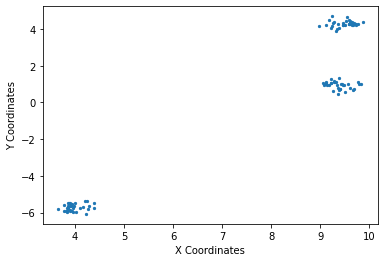

In [2]:
# Scatter plot of the data points
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, -1],s=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

In [3]:
 # Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=4).fit(X)

In [4]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[ 9.4762884 ,  4.29114069],
       [ 3.98450259, -5.71326721],
       [ 9.37303505,  0.94682228]])

In [5]:
# Get the cluster labels
kmeans.labels_

array([0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1,
       2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0,
       1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

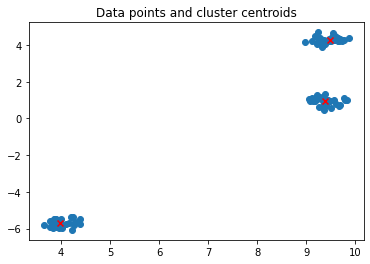

In [6]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [7]:
# Calculate silhouette_score
#means nearest-cluster distance for each sample
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.9173364619914911


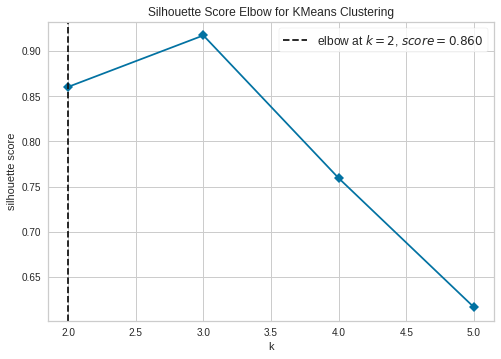

In [8]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=4)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)
# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()

Hand Written Digit Recognition

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
digits = load_digits() #load the dataset in digits

In [11]:
digits.keys() #Dataset loaded is a dictionary
# data : flattened arrays/tensors used for clustering
# target : label associated with flattened array
#print(digits.target)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [12]:
digits.data[0:3] #flattened data for 3 images of the dataset

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

NameError: ignored

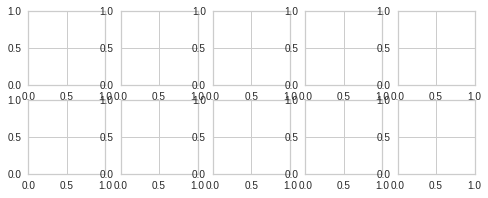

In [16]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of subplots( 2 rows and 5 columns)
centers = k_means.cluster_centers_.reshape(10,8,8)
#flattened image can't be viewed, re-transform/reshape/inverse transform it to original form to view matrix shaped image
#reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8 matrix
for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image & plotting relevant centers
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)